## Bike Routes Used Most By Berri

In [153]:
% matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 


plt.rcParams['figure.figsize'] = (15, 5)

plt.rcParams['figure.figsize'] = (15, 5)

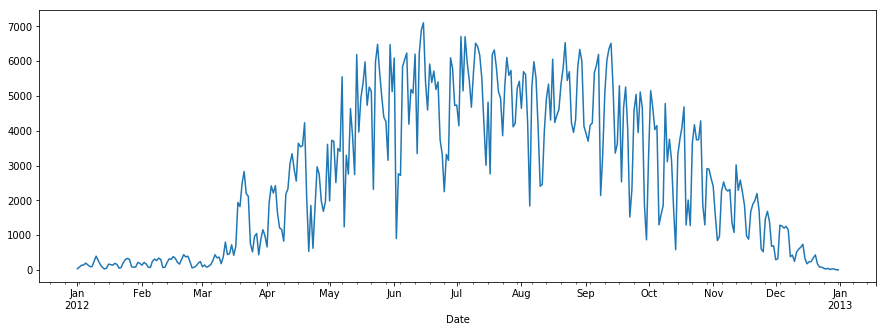

In [155]:
bikes = pd.read_csv('./bikes.csv',parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri1'].plot()


In [156]:
berri_bikes = bikes[['Berri1']].copy()

In [159]:
berri_bikes.head()

,Berri1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [160]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [161]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=366)

In [163]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=366)

In [164]:
berri_bikes['Weekday'] = berri_bikes.index.weekday

berri_bikes.head()



,Berri1,Weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [165]:
weekday_counts = berri_bikes.groupby('Weekday').aggregate(sum)

# this is grouping by weekdays, and summing up all values with same weekday

weekday_counts

,Berri1
Weekday,
0,142285
1,145795
2,163603
3,169976
4,150493
5,105635
6,102447


In [167]:
# Adding index as days of a week will make it more clear

weekday_counts.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts

,Berri1
Monday,142285
Tuesday,145795
Wednesday,163603
Thursday,169976
Friday,150493
Saturday,105635
Sunday,102447


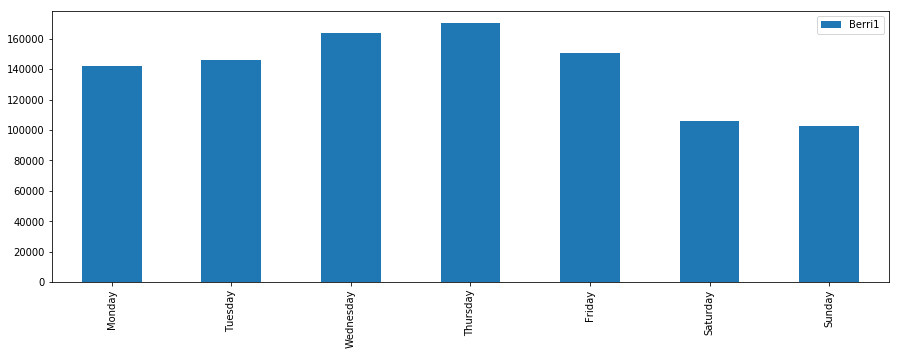

In [169]:
weekday_counts.plot(kind='bar')

# Putting it all together

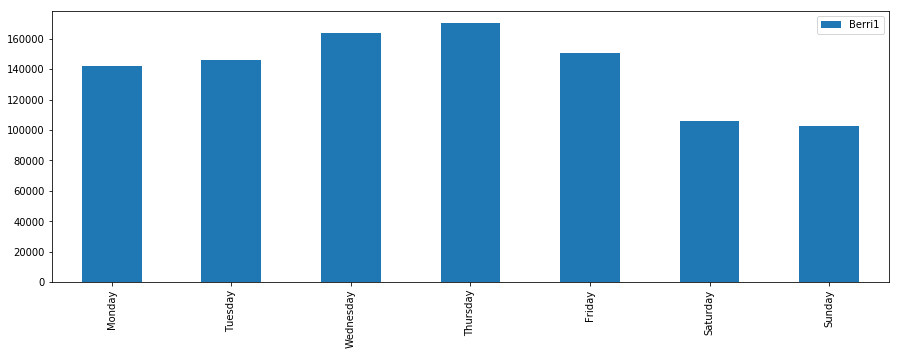

In [180]:
bikes = pd.read_csv('./bikes.csv', parse_dates = ['Date'], dayfirst=True, index_col= ['Date'])

berri_bikes = bikes[['Berri1']].copy()

#Adding weekly column
berri_bikes['weekday']=berri_bikes.index.weekday

#grouping by weekday and summing up all values on a weekday
berri_weekday_counts = berri_bikes.groupby(['weekday']).aggregate(sum)

#adding days in a week as index
berri_weekday_counts.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

berri_weekday_counts.plot(kind='bar')
                              
                              